pip- python package manager
tensorflow
matplotlib
Pillow
tensorflow-hub


In [ ]:
!pip install tensorflow matplotlib Pillow tensorflow-hub


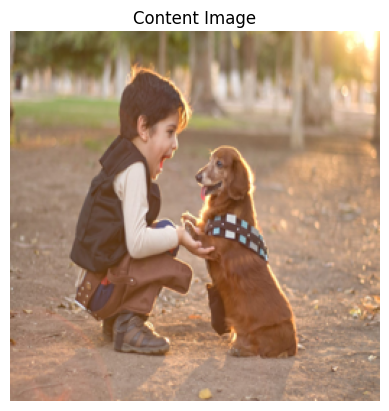

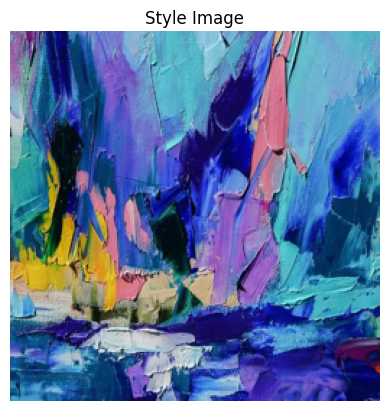

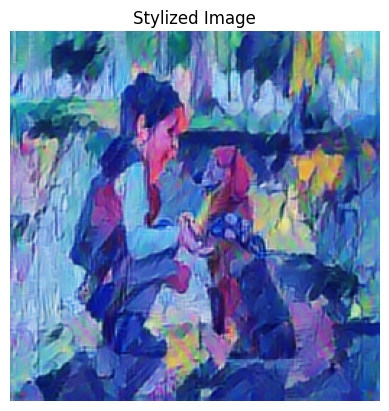

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load and preprocess images
def load_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = image.astype('float32')  # Convert to float32
    return image[np.newaxis, ...]


# Display an image
def show_image(image, title=''):
    plt.imshow(image[0])
    plt.axis('off')
    plt.title(title)
    plt.show()

# Paths to your uploaded content and style images
content_path = '/content/boyanddog.jpg'  # Replace with your uploaded content image path
style_path = '/content/abstract.webp'      # Replace with your uploaded style image path

# Load the images
content_image = load_image(content_path)
style_image = load_image(style_path)

# Load the pre-trained model from TensorFlow Hub
model_url = "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
stylize_model = hub.load(model_url)

# Apply style transfer
stylized_image = stylize_model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the results
show_image(content_image, title="Content Image")
show_image(style_image, title="Style Image")
show_image(stylized_image.numpy(), title="Stylized Image")


In [ ]:
from PIL import Image
stylized_image_np = np.squeeze(stylized_image.numpy())
stylized_image_np = (stylized_image_np * 255).astype(np.uint8)
stylized_image_pil = Image.fromarray(stylized_image_np)
stylized_image_pil.save('stylized_image.jpg')

# Save to local machine
from google.colab import files
files.download('stylized_image.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>